In [1]:
import torch
from torch.utils.data import DataLoader
from lcmr.utils.presentation import display_img
from lcmr_ext.dataset.dataset_7seg import Dataset7Seg
from lcmr_ext.renderer.renderer2d import PyTorch3DRenderer2D
from lcmr_ext.utils import collate_fn

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [2]:
raster_size = (128, 128)
dataset = Dataset7Seg(8, raster_size=raster_size, device=device)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, drop_last=True, collate_fn=collate_fn)

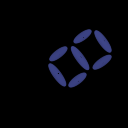

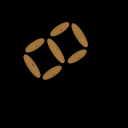

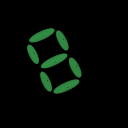

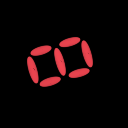

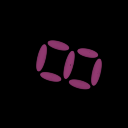

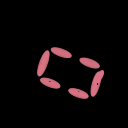

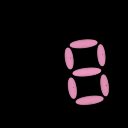

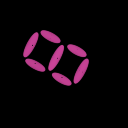

In [3]:
renderer = PyTorch3DRenderer2D(raster_size, background_color=torch.tensor([0.0, 0.0, 0.0, 1.0]), device=device)
for target_img, target_scene in dataloader:
    target_img = target_img.to(device)
    target_scene = target_scene.to(device)
    
    display_img(renderer.render(target_scene)[0])